In [1]:
import numpy as np
import pandas as pd
import anndata as ad
import scanpy as sc
import matplotlib.pyplot as plt

import os
import sys
import logging

In [2]:
stream_object = '/ocean/projects/cis240075p/asachan/datasets/B_Cell/multiome_1st_donor_UPMC_aggr/stream_outs/actb1_added/stream_traj_v5.pkl'
perturb_seq_file = '/ocean/projects/cis240075p/asachan/datasets/B_Cell/perturb_seq_male/240401_merged.h5ad'
output_folder = '/ocean/projects/cis240075p/asachan/datasets/B_Cell/multiome_1st_donor_UPMC_aggr/other_files/objects'

In [ ]:
# import stream as st
# #read the stream result file pkl or h5ad
# adata_traj = st.read(file_name=stream_object, workdir=output_folder)
# adata_perturb_seq = st.read(file_name=perturb_seq_file, workdir=output_folder)


Working directory is already specified as '/tmp/tmptccf43nu' 
To change working directory, please run set_workdir(adata,workdir=new_directory)
Saving results in: /ocean/projects/cis240075p/asachan/datasets/B_Cell/multiome_1st_donor_UPMC_aggr/other_files/objects


In [3]:
# read h5ad using scanpy
adata_perturb_seq = sc.read_h5ad(perturb_seq_file)

In [4]:
adata_perturb_seq

AnnData object with n_obs × n_vars = 35822 × 22950
    obs: 'group', 'batch', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'topic_0', 'topic_1', 'topic_2', 'topic_3', 'topic_4', 'topic_5', 'topic_6', 'topic_7', 'topic_8', 'topic_9', 'topic_10', 'topic_11', 'topic_12', 'topic_13', 'topic_14', 'topic_15', 'topic_16', 'topic_17', 'topic_18', 'topic_19', 'topic_20', 'topic_21', 'topic_22', 'topic_23', 'topic_24', 'topic_25', 'topic_26', 'topic_27', 'topic_28', 'topic_29', 'topic_30', 'topic_31', 'topic_32', 'topic_33', 'topic_34', 'topic_35', 'topic_36', 'day', 'knockout', 'replicate', 'D6_spib_r2', 'x', 'D6_prdm1_r2', 'D4_irf8_r2', 'D6_irf4_r2', 'D4_batf_r2', 'D4_irf4_r2', 'D4_prdm1_r2', 'D6_batf_r2', 'D6_ntc_r2', 'D4_spib_r2', 'D4_ntc_r2', 'D6_irf8_r2', 'D4_spib_r1', 'D6_spib_r1', 'leiden'
    var: 'gene_ids', 'feature_types', 'genome', 'pattern', 'read', 'sequence', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'tota

In [12]:
adata_perturb_seq.var['mt'].sum()

13

/ocean/projects/cis240075p/asachan/.conda/envs/scvelo/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


<Axes: title={'center': 'leiden'}, xlabel='UMAP1', ylabel='UMAP2'>

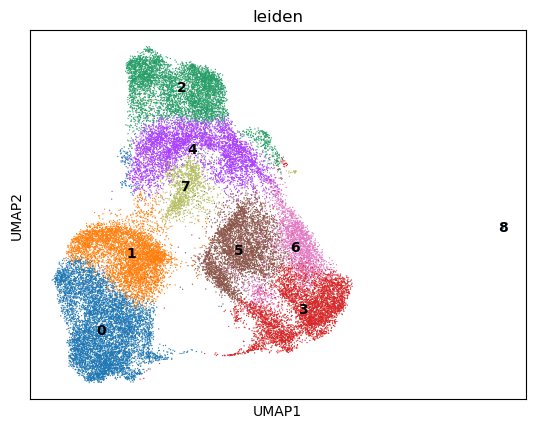

In [15]:
sc.pl.umap(adata_perturb_seq, color=['leiden'], legend_loc='on data', show=False)

In [11]:
#select one group from the obs 'group' column
adata_perturb_seq_group = adata_perturb_seq[adata_perturb_seq.obs['group'] == 'D4_prdm1_r2']
adata_perturb_seq_group


View of AnnData object with n_obs × n_vars = 2448 × 22950
    obs: 'group', 'batch', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'topic_0', 'topic_1', 'topic_2', 'topic_3', 'topic_4', 'topic_5', 'topic_6', 'topic_7', 'topic_8', 'topic_9', 'topic_10', 'topic_11', 'topic_12', 'topic_13', 'topic_14', 'topic_15', 'topic_16', 'topic_17', 'topic_18', 'topic_19', 'topic_20', 'topic_21', 'topic_22', 'topic_23', 'topic_24', 'topic_25', 'topic_26', 'topic_27', 'topic_28', 'topic_29', 'topic_30', 'topic_31', 'topic_32', 'topic_33', 'topic_34', 'topic_35', 'topic_36', 'day', 'knockout', 'replicate', 'D6_spib_r2', 'x', 'D6_prdm1_r2', 'D4_irf8_r2', 'D6_irf4_r2', 'D4_batf_r2', 'D4_irf4_r2', 'D4_prdm1_r2', 'D6_batf_r2', 'D6_ntc_r2', 'D4_spib_r2', 'D4_ntc_r2', 'D6_irf8_r2', 'D4_spib_r1', 'D6_spib_r1', 'leiden'
    var: 'gene_ids', 'feature_types', 'genome', 'pattern', 'read', 'sequence', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts'